In [21]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('monthly_co2.csv', index_col=[0, 1])
df.head()

co2
year month        
1958 3      315.70
     4      317.45
     5      317.51
     6      317.24
     7      315.86

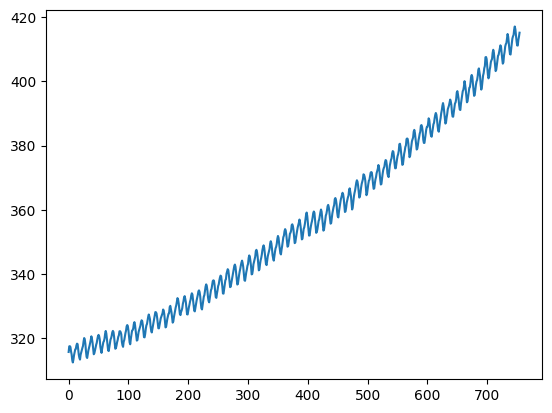

In [9]:
plt.plot(df.co2.values)

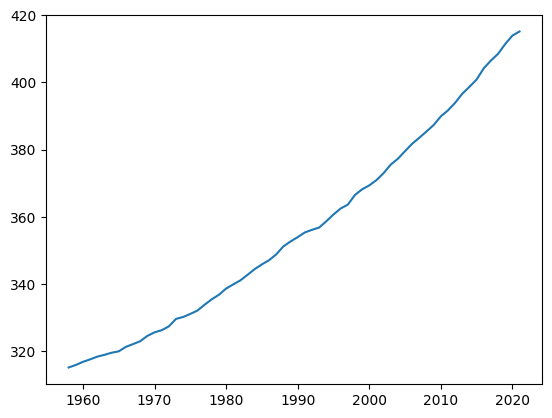

In [10]:
by_year = df.groupby('year').mean().co2
plt.plot(by_year)

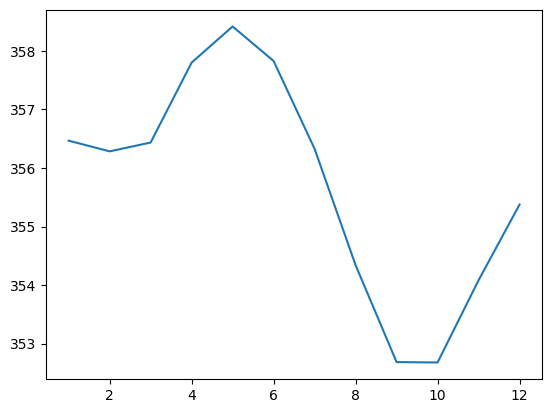

In [11]:
by_month = df.groupby('month').mean().co2
plt.plot(by_month)

In [13]:
ds = xr.Dataset.from_dataframe(df)
ds

<xarray.Dataset> Size: 7kB
Dimensions:  (year: 64, month: 12)
Coordinates:
  * year     (year) int64 512B 1958 1959 1960 1961 1962 ... 2018 2019 2020 2021
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    co2      (year, month) float64 6kB nan nan 315.7 317.4 ... nan nan nan nan

In [15]:
ds['co2'][:10, :5]

<xarray.DataArray 'co2' (year: 10, month: 5)> Size: 400B
array([[   nan,    nan, 315.7 , 317.45, 317.51],
       [315.58, 316.49, 316.65, 317.72, 318.29],
       [316.43, 316.98, 317.58, 319.03, 320.04],
       [316.89, 317.7 , 318.54, 319.48, 320.58],
       [317.94, 318.55, 319.68, 320.57, 321.02],
       [318.74, 319.07, 319.86, 321.38, 322.25],
       [319.57, 320.01, 320.74, 321.84, 322.26],
       [319.44, 320.44, 320.89, 322.14, 322.17],
       [320.62, 321.6 , 322.39, 323.7 , 324.08],
       [322.33, 322.5 , 323.04, 324.42, 325.  ]])
Coordinates:
  * year     (year) int64 80B 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967
  * month    (month) int64 40B 1 2 3 4 5

In [16]:
ds['co2'].sel(year=1960)

<xarray.DataArray 'co2' (month: 12)> Size: 96B
array([316.43, 316.98, 317.58, 319.03, 320.04, 319.58, 318.18, 315.9 ,
       314.17, 313.83, 315.  , 316.19])
Coordinates:
    year     int64 8B 1960
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [17]:
ds.mean(dim='month')

<xarray.Dataset> Size: 1kB
Dimensions:  (year: 64)
Coordinates:
  * year     (year) int64 512B 1958 1959 1960 1961 1962 ... 2018 2019 2020 2021
Data variables:
    co2      (year) float64 512B 315.2 316.0 316.9 317.6 ... 411.4 413.9 415.2

In [18]:
%timeit df.groupby('year').mean().co2

781 µs ± 48.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [19]:
%timeit ds.mean(dim='month')

332 µs ± 41.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [22]:
measures = np.load('2d_measure.npy')
measures.shape

(100, 100, 3)

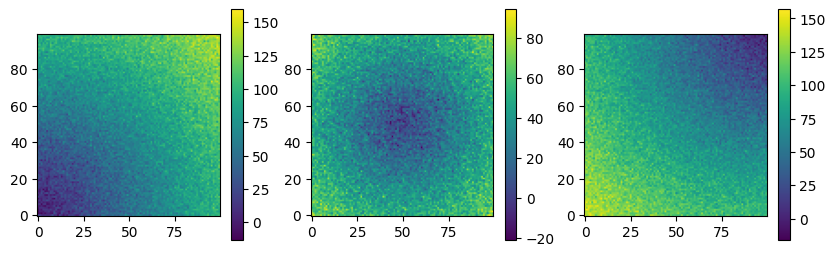

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

for i in range(3):
    c = ax[i].imshow(measures[:, :, i], origin='lower')
    plt.colorbar(c, ax=ax[i])

plt.show()